In [ ]:
# 1. PageRank Algorithm

import numpy as np
from scipy.linalg import eig

# define the matrix M
M = np.array([
    [0,   0,   1/2, 0],
    [1/3, 0,   0,   1/2],
    [1/3, 1/2, 0,   1/2],
    [1/3, 1/2, 1/2, 0]
])

# compute eigenvalues and eigenvectors
values, vectors = eig(M)

# find the dominant eigenvector (eigenvalue closest to 1)
index = np.argmax(np.real(values))
pagerank = np.real(vectors[:, index])

# normalize so the sum of all ranks equals 1
pagerank = pagerank / np.sum(pagerank)

print("PageRank Scores (normalized):")
print(pagerank)

# determine which page has the highest rank
highest = np.argmax(pagerank) + 1
print("\nHighest ranked page: Page", highest)

PageRank Scores (normalized):
[0.15789474 0.21052632 0.31578947 0.31578947]

Highest ranked page: Page 3


Covariance Matrix:
[[1.02608749 0.11769063]
 [0.11769063 1.08134929]]

Eigenvalues:
[1.17460905 0.93282774]

Eigenvectors (Principal Components):
[[ 0.62106317 -0.78376051]
 [ 0.78376051  0.62106317]]


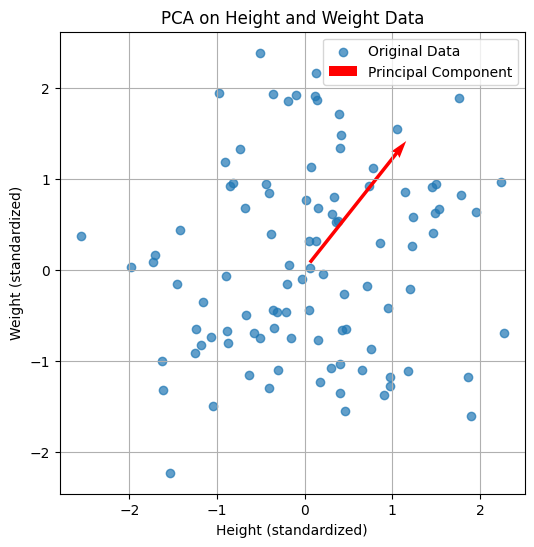

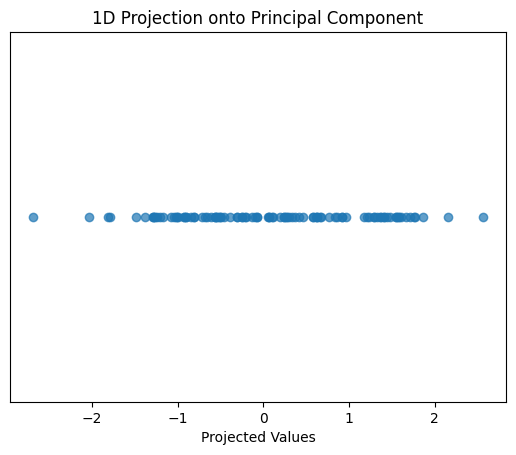

In [ ]:
# 2. Dimensionality Reduction via PCA

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# load the standardized height and weight data from data.csv
# skip the first row because it contains headers
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)

# compute the covariance matrix
cov_matrix = np.cov(data, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

# perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = eigh(cov_matrix)

# sort the eigenvalues and eigenvectors into descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors (Principal Components):")
print(eigenvectors)

# select principal component with the largest eigenvalue
principal_component = eigenvectors[:, 0]

# project the data onto the principal component (reduce to 1D)
projected_data = data.dot(principal_component)

# plot original data with the main principal component
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], label='Original Data', alpha=0.7)
plt.quiver(np.mean(data[:, 0]), np.mean(data[:, 1]),
           principal_component[0], principal_component[1],
           scale=3, color='red', label='Principal Component')

plt.title('PCA on Height and Weight Data')
plt.xlabel('Height (standardized)')
plt.ylabel('Weight (standardized)')
plt.legend()
plt.grid(True)
plt.show()

# plot the 1D projection
plt.figure()
plt.scatter(projected_data, np.zeros_like(projected_data), alpha=0.7)
plt.title('1D Projection onto Principal Component')
plt.xlabel('Projected Values')
plt.yticks([])
plt.show()


In [ ]:
# 3. Linear Regression via Least Squares

import numpy as np
from scipy.linalg import lstsq, solve

# define the dataset
# columns represent: [Square Footage, Bedrooms, Age]
X = np.array([
    [2100, 3, 20],
    [2500, 4, 15],
    [1800, 2, 30],
    [2200, 3, 25]
])

# corresponding house prices in $1000s
y = np.array([460, 540, 330, 400])

# solve for beta using least squares method
beta, residuals, rank, s = lstsq(X, y)

print("Coefficients (Square Footage, Bedrooms, Age):")
print(beta)

# predict the price of a house with given features
new_house = np.array([2400, 3, 20])
predicted_price = new_house.dot(beta)

print("\nPredicted Price for [2400 sq ft, 3 bedrooms, 20 years old]:")
print(predicted_price)

# compare with direct solution using normal equations
beta_direct = solve(X.T @ X, X.T @ y)

print("\nCoefficients using direct solution:")
print(beta_direct)

# compare both results
print("\nDifference between lstsq and direct solution:")
print(beta - beta_direct)

Coefficients (Square Footage, Bedrooms, Age):
[    3.2875 -1628.75     -77.75  ]

Predicted Price for [2400 sq ft, 3 bedrooms, 20 years old]:
1448.7500000000373

Coefficients using direct solution:
[    3.2875     -1628.75000001   -77.75      ]

Difference between lstsq and direct solution:
[-1.30953026e-11  6.99674274e-09  3.18479465e-10]


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Final Loss Value:
0.0


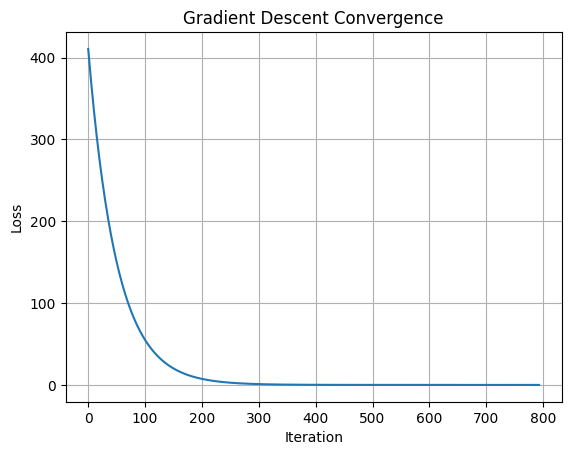


Converged after 794 iterations
Final loss from manual gradient descent:
4.9066093059130166e-05


In [ ]:
# 4. Gradient Descent for Minimizing Loss Function

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# random seed for reproducibility
np.random.seed(0)

# initialize matrices X and A with random values
X_init = np.random.rand(100, 50)
A = np.random.rand(100, 50)

# define the loss function
# f(X) = (1/2) * sum((X - A)^2)
def loss(X_flat):
    X = X_flat.reshape(100, 50)
    return 0.5 * np.sum((X - A) ** 2)

# define gradient of the loss function
def grad(X_flat):
    X = X_flat.reshape(100, 50)
    return (X - A).flatten()

# run gradient descent
result = minimize(loss, X_init.flatten(), jac=grad,
                  method='CG', tol=1e-6,
                  options={'maxiter': 1000, 'disp': True})

# reshape optimized result back into matrix form
X_optimized = result.x.reshape(100, 50)

# compute final loss
final_loss = loss(X_optimized.flatten())

print("Final Loss Value:")
print(final_loss)

# track convergence information
loss_values = []

# manual gradient descent tracking
X_manual = X_init.copy()
alpha = 0.01  # learning rate
for i in range(1000):
    grad_X = X_manual - A
    X_manual = X_manual - alpha * grad_X
    current_loss = 0.5 * np.sum((X_manual - A) ** 2)
    loss_values.append(current_loss)
    if i > 0 and abs(loss_values[-2] - current_loss) < 1e-6:
        break

# plot loss values over iterations
plt.plot(loss_values)
plt.title('Gradient Descent Convergence')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

print("\nConverged after", len(loss_values), "iterations")
print("Final loss from manual gradient descent:")
print(loss_values[-1])